In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os

In [2]:
datadir = "train/"
target_arr = []
flat_data_arr = []

for index in range(len(os.listdir(datadir))):
    folder_path=(os.path.join(datadir,os.listdir(datadir)[index])) 
    for file in os.listdir(folder_path):
        target_arr.append(index)
        img_array = imread(os.path.join(folder_path,file))
        img_resized = resize(img_array,(64,64,3))
        flat_data_arr.append(img_resized)
    print(os.listdir(datadir)[index])
target = np.array(target_arr)
data = np.array(flat_data_arr)

01_palm
02_l
03_fist
04_fist_moved
05_thumb
06_index
07_ok
08_palm_moved
09_c
10_down


In [3]:
category = ["palm","L","fist","fist_moved","thumb","index","ok","palm_moved","C","down"]
x = data
y = target
len(data)

2000

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
len(x_test)

600

In [5]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(category[y[index]])

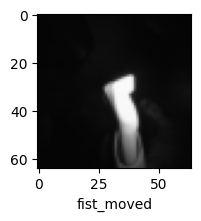

In [6]:
plot_sample(x_train,y_train,9)

In [7]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.4440 - loss: 1.5859
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9898 - loss: 0.0250
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.9982 - loss: 0.0067
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 1.0000 - loss: 2.7737e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 1.0000 - loss: 1.9144e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 1.0000 - loss: 1.4263e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 1.0000 - loss: 1.0563e-04
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 1.0000 - loss: 8.7523e-05
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 1.0000 - loss: 8.0789e-05


In [10]:
 cnn.evaluate(x_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 3.8196e-04


[0.0006672391900792718, 1.0]

In [11]:
y_predict = cnn.predict(x_test)
y_result = [np.argmax(element) for element in y_predict]

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


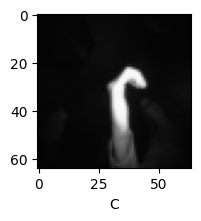

In [12]:
plot_sample(x_test,y_test,0)

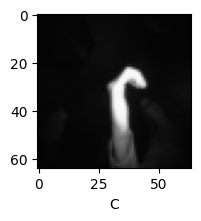

In [13]:
plot_sample(x_test,y_result,0)

In [16]:
report = classification_report(y_test,y_result)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        53\n           1       1.00      1.00      1.00        53\n           2       1.00      1.00      1.00        74\n           3       1.00      1.00      1.00        52\n           4       1.00      1.00      1.00        59\n           5       1.00      1.00      1.00        59\n           6       1.00      1.00      1.00        63\n           7       1.00      1.00      1.00        59\n           8       1.00      1.00      1.00        71\n           9       1.00      1.00      1.00        57\n\n    accuracy                           1.00       600\n   macro avg       1.00      1.00      1.00       600\nweighted avg       1.00      1.00      1.00       600\n'